In [157]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with clustering
from sklearn.cluster import KMeans, AgglomerativeClustering

# To help with model building
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# to compute distances
from scipy.cluster.hierarchy import dendrogram, linkage, distance, single, cophenet
from scipy.spatial.distance import pdist
from scipy.stats import zscore

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Problem Statement

### Description  
#### Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

### Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

### Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

### Data Dictionary

**Sl_No**: Primary key of the records  
**Customer Key**: Customer identification number  
**Average Credit Limit**: Average credit limit of each customer for all credit cards  
**Total credit cards**: Total number of credit cards possessed by the customer  
**Total visits bank**: Total number of visits that customer made (yearly) personally to the bank  
**Total visits online**: Total number of visits or online logins made by the customer (yearly)  
**Total calls made**: Total number of calls made by the customer to the bank or its customer service department (yearly)  

## Scoring Rubric - AllLife Bank Customer Segmentation

##### Define the problem and perform an Exploratory Data Analysis - **6**  
- Problem definition, questions to be answered 
- Data background and contents 
- Univariate analysis 
- Bivariate analysis 
- Insights based on EDA  

##### Data preprocessing - 4  
- Prepare the data for analysis 
- Feature engineering 
- Missing value treatment 
- Outlier treatment 
- Duplicate observations check  

##### Applying K-means Clustering - 10  
- Apply K-means Clustering 
- Plot the Elbow curve 
- Check Silhouette Scores 
- Figure out appropriate number of clusters 
- Cluster Profiling  

##### Applying Hierarchical Clustering - 10  
- Apply Hierarchical clustering with different linkage methods 
- Plot dendrograms for each linkage method 
- Check cophenetic correlation for each linkage method 
- Figure out appropriate number of clusters - Cluster Profiling  

##### K-means vs Hierarchical Clustering - 2  
- Compare clusters obtained from K-means and Hierarchical clustering techniques  

##### Actionable Insights & Recommendations - 4  
- Conclude with the key takeaways for the business 
- What would be your recommendations to the business?  

##### Notebook - Overall Quality - 4  
- Structure and flow - Well commented code  


## Actionable Insights & Recommendations  
- Conclude with the key takeaways for the business 
- What would be your recommendations to the business?  

In [158]:
# Ingest the excel spreadsheet into a data frame and read its shape
df = pd.read_excel('Credit+Card+Customer+Data.xlsx')
df.shape

(660, 7)

<IPython.core.display.Javascript object>

In [159]:
# lets take a look a the data frame
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [160]:
# view of the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.000,330.500,190.670,1.000,165.750,330.500,495.250,660.000
Customer Key,660.000,55141.444,25627.772,11265.000,33825.250,53874.500,77202.500,99843.000
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_visits_bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_visits_online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_calls_made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


<IPython.core.display.Javascript object>

In [162]:
# Printing a list of unique values, values shown in text file. Some categories have a large number of values so dropping those
vc = df.columns.drop(['Sl_No','Customer Key'])
for i in vc:
    print(i,'Has the following Unique Values')
    print(df[i].value_counts().sort_values(ascending=False))
    print('-'*50)

Avg_Credit_Limit Has the following Unique Values
8000      35
6000      31
13000     28
9000      28
10000     26
          ..
25000      1
157000     1
126000     1
200000     1
43000      1
Name: Avg_Credit_Limit, Length: 110, dtype: int64
--------------------------------------------------
Total_Credit_Cards Has the following Unique Values
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
8      11
9      11
Name: Total_Credit_Cards, dtype: int64
--------------------------------------------------
Total_visits_bank Has the following Unique Values
2    158
1    112
0    100
3    100
5     98
4     92
Name: Total_visits_bank, dtype: int64
--------------------------------------------------
Total_visits_online Has the following Unique Values
2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
8       6
10      6
12      6
11      5
13      5
9       4
6       1
14      1
Name: Total_visits_online, dtype: int64
---------------------

<IPython.core.display.Javascript object>

#### Intial Observations
- Avg Credit Limit: Has a massive range from 3,000 - 200,000. However the 75th quartile is only 48,000
- We will need to check and deal with outliers in Avg Credit Limit before scaling the data
- Potential Outliers
    - Avg_Credit_Limit
    - Total_Credit_Cards
    - Total_visits_online
    - Total_calls_made
- Total_Credit_Cards: The average number of ccds per customer is almost 5. However the max is 10 but the 75% quartile is only 6. Its interesting that the 75% quartile is so close to the average
- Total_vists_bank: Looks like this will be fairly normally distributed data
- Total_vists_online: The 75% quartile is only 4 and the average is 2.6 vists. The max however is 15, we will need to look at outliers here
- Total_calls_made: Average is 3.5, 75% quartile is 5, max is 10. 

### EDA

#### Data Preprocessing
- Prepare the data for analysis 
- Feature engineering 
- Missing value treatment 
- Outlier treatment 
- Duplicate observations check
- Scale the Data


##### Prepare the data for analysis  
- Drop Sl_No - redudant with the row id
- Drop Customer Key - not relevant for clustering
- Scale Average Credit Limit


In [163]:
df.drop(['Sl_No','Customer Key'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [164]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [165]:
# check for duplicates, no duplicates found
df.duplicated().sum()

11

<IPython.core.display.Javascript object>

In [166]:
# Generating a data frame of missing values by count and %, no missing values found
missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.DataFrame(missing, columns=['%'])
missing['count'] = df.isnull().sum()

#printing missing values
print('Missing Values in the data frame')
missing.head()

Missing Values in the data frame


,%,count
Avg_Credit_Limit,0.000,0
Total_Credit_Cards,0.000,0
Total_visits_bank,0.000,0
Total_visits_online,0.000,0
Total_calls_made,0.000,0


<IPython.core.display.Javascript object>

### EDA Reusable Function

In [167]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [168]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [169]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [170]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

#### Univariate Analysis

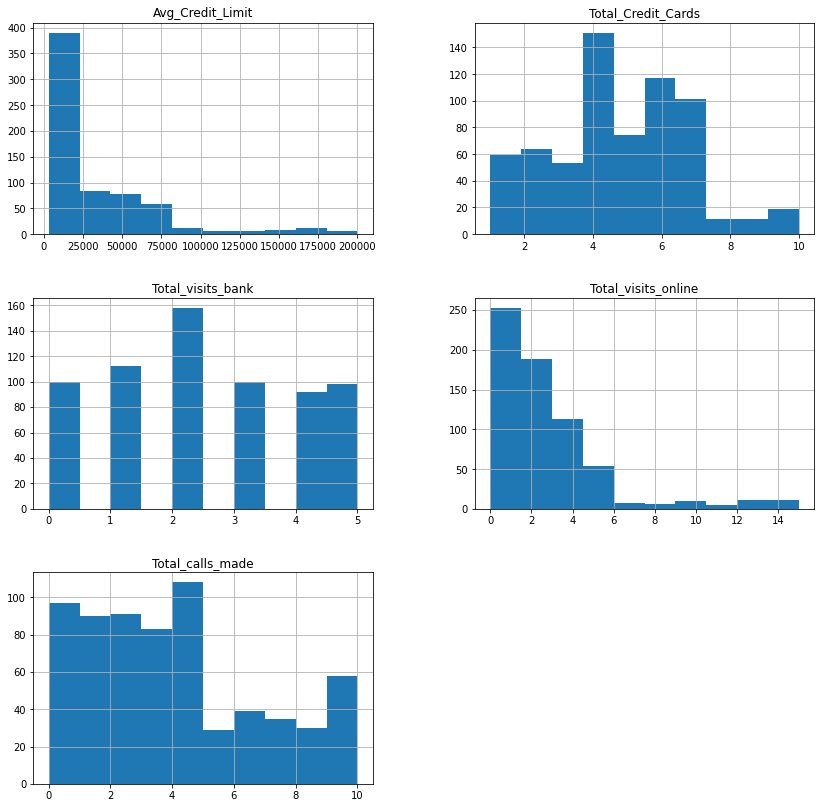

<IPython.core.display.Javascript object>

In [171]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

[None, None, None, None, None]

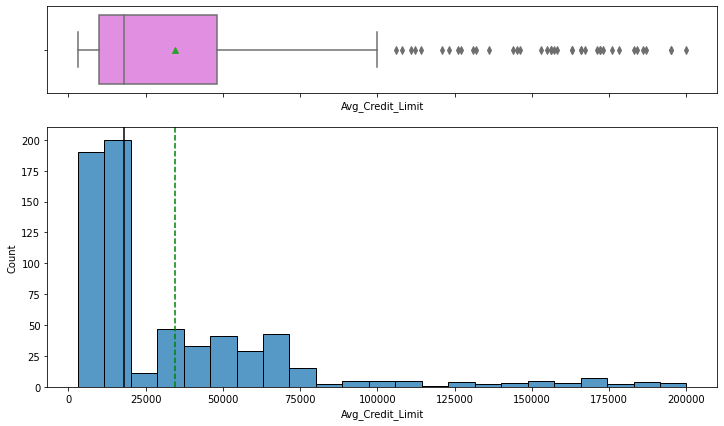

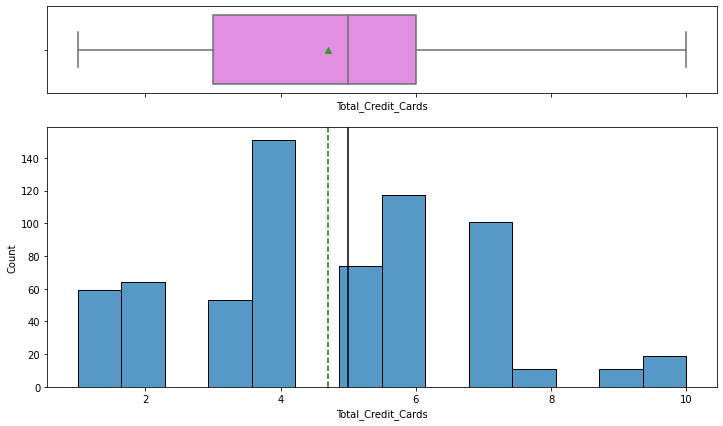

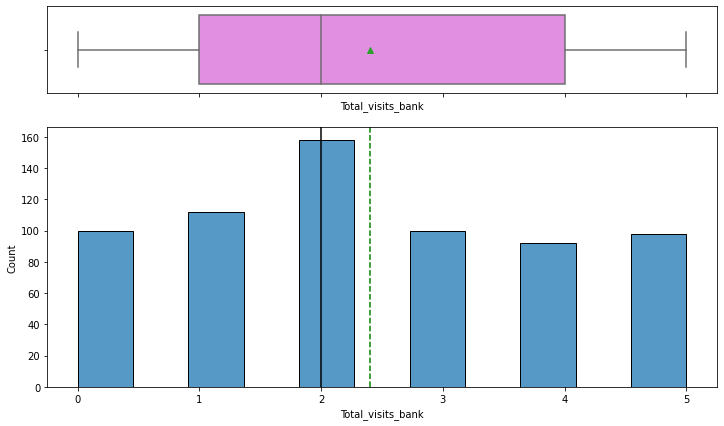

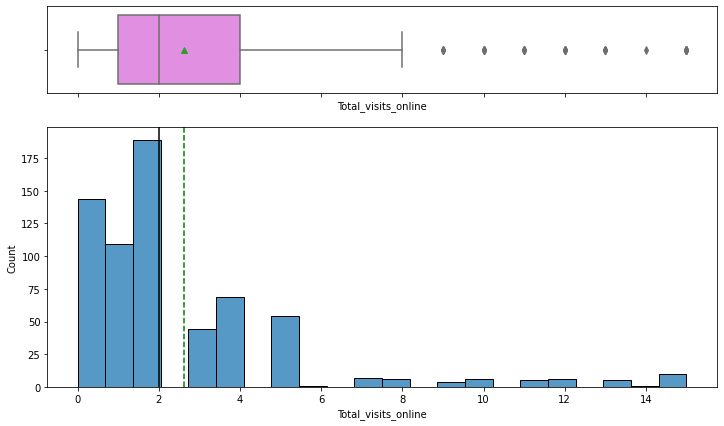

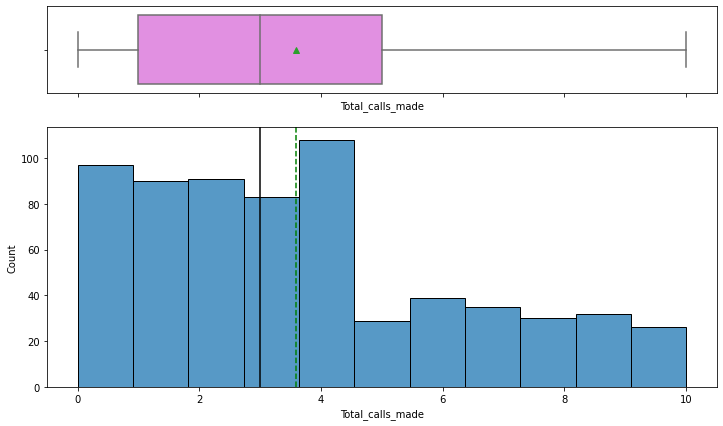

<IPython.core.display.Javascript object>

In [172]:
# Generating Histograms and Boxplots for all columns
[histogram_boxplot(df, i) for i in df.columns]

In [173]:
# Avg_Credit_Limit & Total_visits_online have some outliers, lets do a count of how many outliers are in each attribute and what % of the data do they make up
acl_outliers = (df['Avg_Credit_Limit'] >= 100000).sum()
tvo_outliers = (df['Total_visits_online'] >= 8).sum()

rows = df.shape[0]


print('Number of outliers in Average Credit Limit: ', acl_outliers)
print('Percentage of outliers in Average Credit Limit: ', rows / acl_outliers)
print('-' * 75)
print('Number of outliers in Total Visits Online: ', tvo_outliers)
print('Percentage of outliers in Total Visits Online: ', rows / tvo_outliers)

Number of outliers in Average Credit Limit:  42
Percentage of outliers in Average Credit Limit:  15.714285714285714
---------------------------------------------------------------------------
Number of outliers in Total Visits Online:  43
Percentage of outliers in Total Visits Online:  15.348837209302326


<IPython.core.display.Javascript object>

##### Thoughts on Outliers

- Potential outliers for both attributes represent over 15% of the data set. This quite a large percentage in my opinion.
- Given the % of the data set these make up less inclided to see them outliers and more inclined to see them as part of the data set that trends on the high end
- Will look deeper at both of these in bivariate analysis to see if the shape of the data changes without the outliers

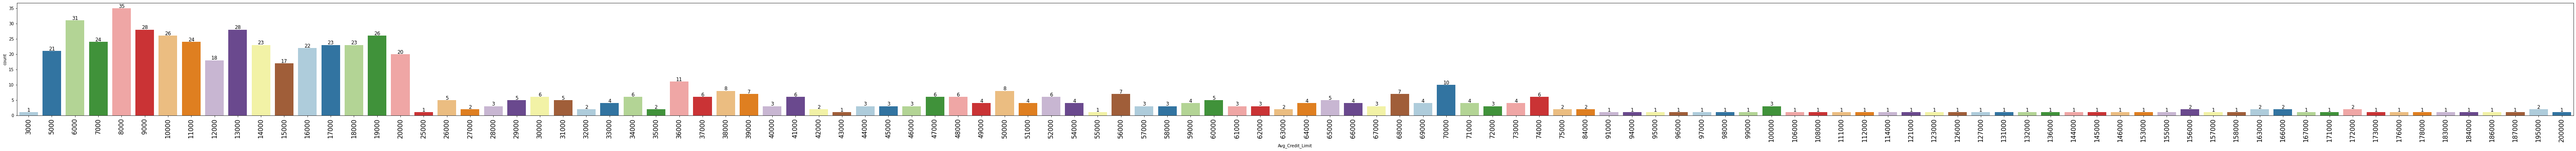

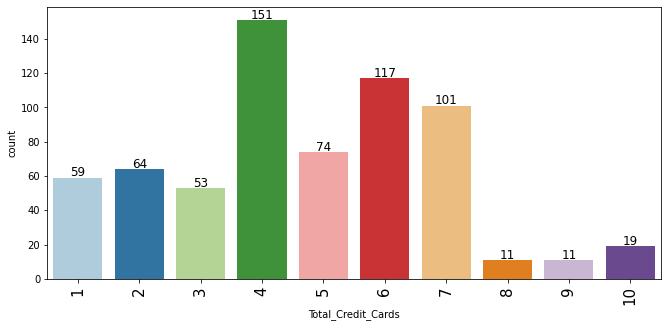

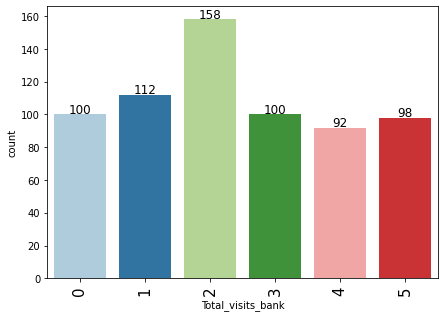

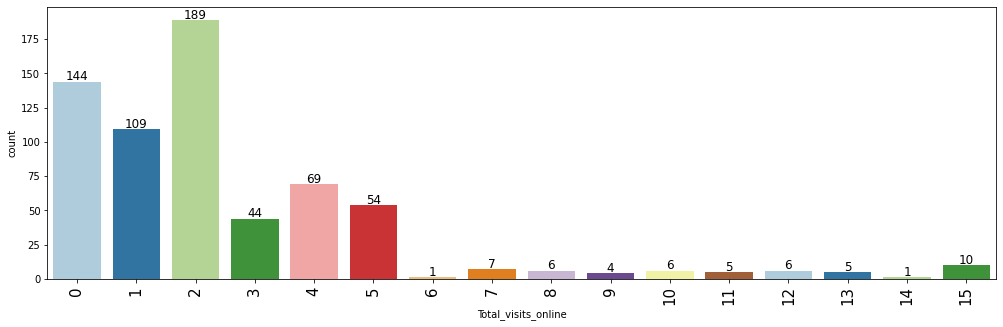

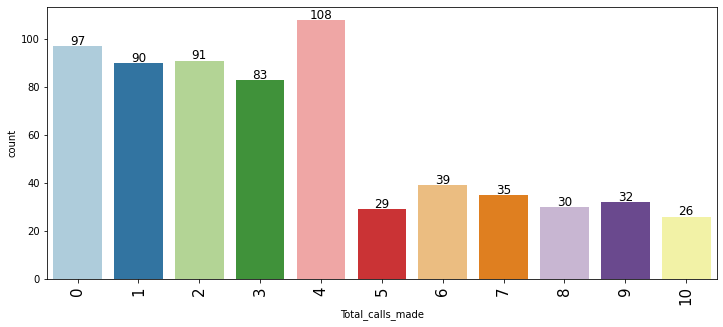

[None, None, None, None, None]

<IPython.core.display.Javascript object>

In [174]:
[labeled_barplot(df, i) for i in df.columns]

#### Bivariate Analysis

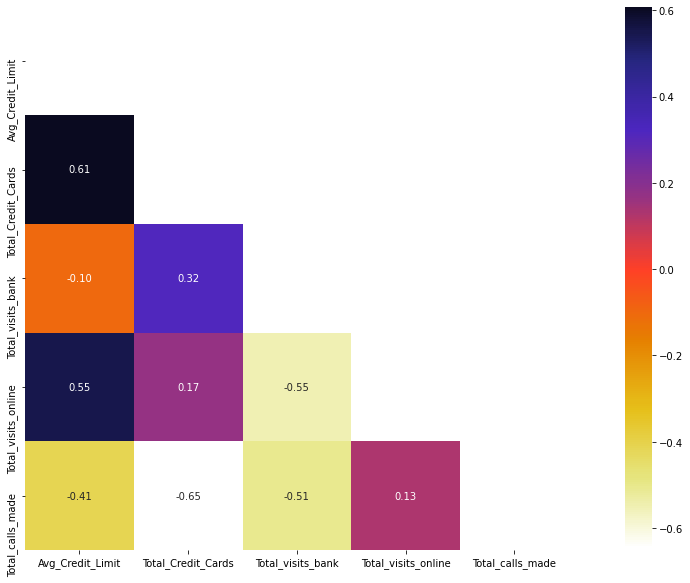

<IPython.core.display.Javascript object>

In [175]:
# Generating the lower half a heatmap only
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='CMRmap_r')
plt.show()

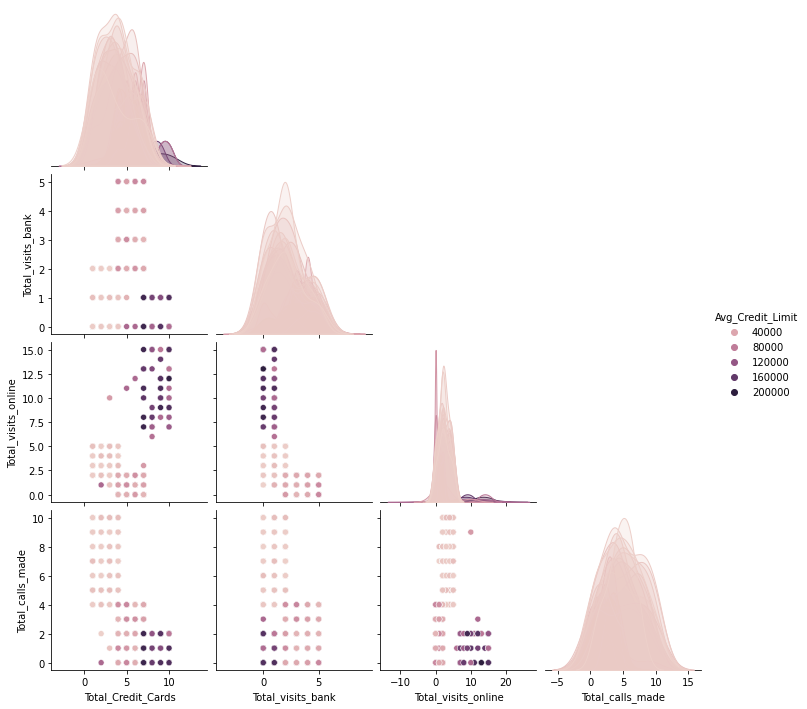

<IPython.core.display.Javascript object>

In [176]:
# Generating the lower half a heatmap only
sns.pairplot(df, corner=True, hue='Avg_Credit_Limit')
plt.show()

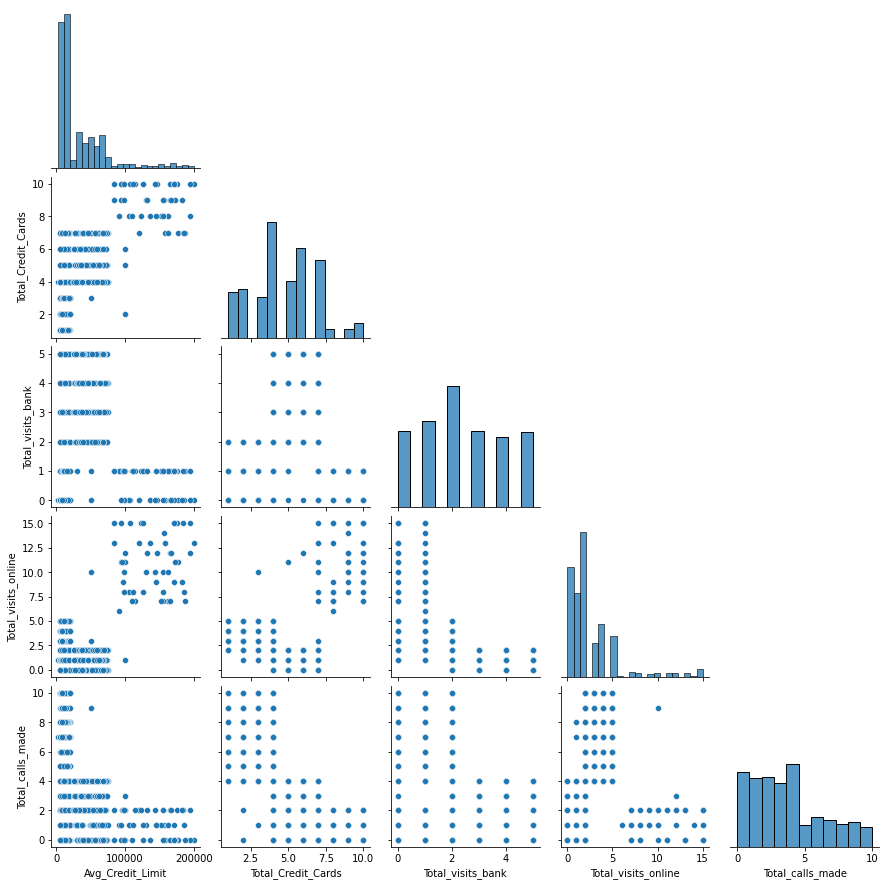

<IPython.core.display.Javascript object>

In [177]:
# Generating the lower half a heatmap only, no hue
sns.pairplot(df, corner=True)
plt.show()

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Avg_Credit_Limit                                                  
All                 59  64  53  151  74  117  101  11  11  19  660
173000               0   0   0    0   0    0    0   0   1   0    1
131000               0   0   0    0   0    0    0   0   1   0    1
132000               0   0   0    0   0    0    0   0   1   0    1
98000                0   0   0    0   0    0    0   0   1   0    1
...                 ..  ..  ..  ...  ..  ...  ...  ..  ..  ..  ...
41000                0   0   0    1   1    1    3   0   0   0    6
40000                0   0   0    0   2    1    0   0   0   0    3
39000                0   0   0    0   1    1    5   0   0   0    7
38000                0   0   0    5   0    2    1   0   0   0    8
64000                0   0   0    2   1    1    0   0   0   0    4

[111 rows x 11 columns]
--------------------------------------------------------------------------------------------------------

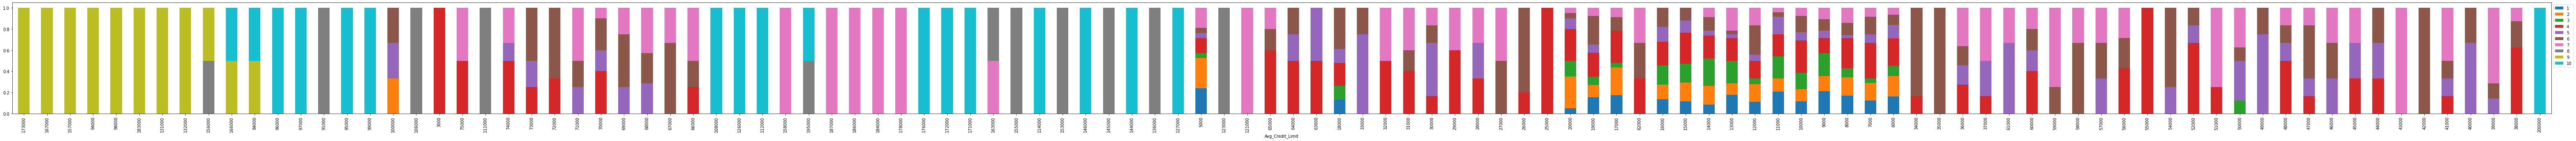

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_Credit_Cards                                                
9                    0   0   0    0   0    0    0   0  11   0   11
All                 59  64  53  151  74  117  101  11  11  19  660
1                   59   0   0    0   0    0    0   0   0   0   59
2                    0  64   0    0   0    0    0   0   0   0   64
3                    0   0  53    0   0    0    0   0   0   0   53
4                    0   0   0  151   0    0    0   0   0   0  151
5                    0   0   0    0  74    0    0   0   0   0   74
6                    0   0   0    0   0  117    0   0   0   0  117
7                    0   0   0    0   0    0  101   0   0   0  101
8                    0   0   0    0   0    0    0  11   0   0   11
10                   0   0   0    0   0    0    0   0   0  19   19
------------------------------------------------------------------------------------------------------------------------


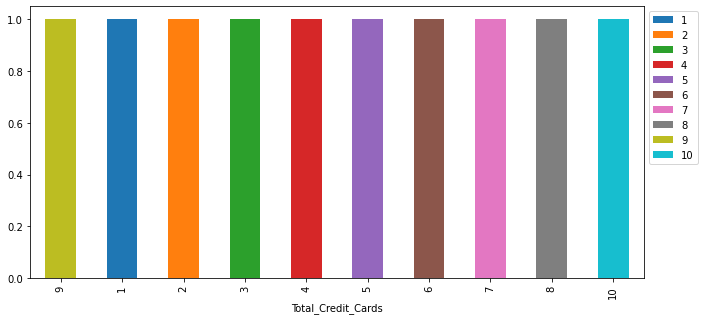

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_visits_bank                                                 
All                 59  64  53  151  74  117  101  11  11  19  660
1                   21  19  18   22   1    0    4   7   8  12  112
0                   21  25  21   13   1    1    4   4   3   7  100
2                   17  20  14   35  24   24   24   0   0   0  158
3                    0   0   0   26  15   34   25   0   0   0  100
4                    0   0   0   27  18   24   23   0   0   0   92
5                    0   0   0   28  15   34   21   0   0   0   98
------------------------------------------------------------------------------------------------------------------------


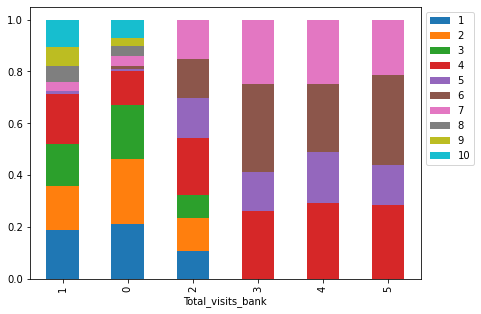

Total_Credit_Cards    1   2   3    4   5    6    7   8   9  10  All
Total_visits_online                                                
All                  59  64  53  151  74  117  101  11  11  19  660
12                    0   0   0    0   0    1    0   0   3   2    6
11                    0   0   0    0   1    0    1   0   2   1    5
10                    0   0   1    0   0    0    1   0   2   2    6
9                     0   0   0    0   0    0    0   1   1   2    4
15                    0   0   0    0   0    0    1   2   1   6   10
14                    0   0   0    0   0    0    0   0   1   0    1
8                     0   0   0    0   0    0    1   2   1   2    6
1                     0   1   2   25  23   38   20   0   0   0  109
7                     0   0   0    0   0    0    1   4   0   2    7
6                     0   0   0    0   0    0    0   1   0   0    1
5                    15  16  16    7   0    0    0   0   0   0   54
4                    17  18  14   20   0    0   

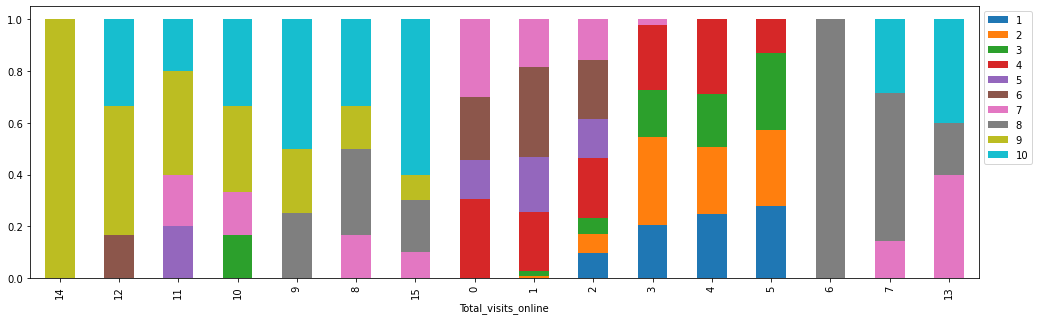

Total_Credit_Cards   1   2   3    4   5    6    7   8   9  10  All
Total_calls_made                                                  
All                 59  64  53  151  74  117  101  11  11  19  660
2                    0   1   0   21  15   20   19   2   6   7   91
0                    0   1   0   23  13   27   20   4   3   6   97
1                    0   0   1   22  14   22   18   5   2   6   90
3                    0   0   0   19  14   30   20   0   0   0   83
4                    6  12   7   23  18   18   24   0   0   0  108
5                    8   7   8    6   0    0    0   0   0   0   29
6                    7  11  13    8   0    0    0   0   0   0   39
7                   12   8   6    9   0    0    0   0   0   0   35
8                    7  12   4    7   0    0    0   0   0   0   30
9                   10   6   9    7   0    0    0   0   0   0   32
10                   9   6   5    6   0    0    0   0   0   0   26
--------------------------------------------------------------

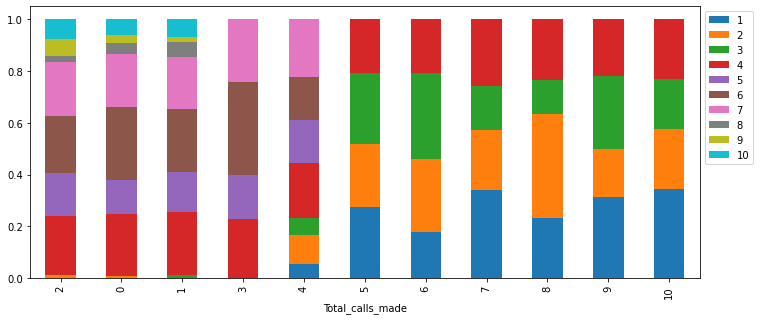

[None, None, None, None, None]

<IPython.core.display.Javascript object>

In [178]:
[stacked_barplot(df, i, 'Total_Credit_Cards') for i in df.columns]

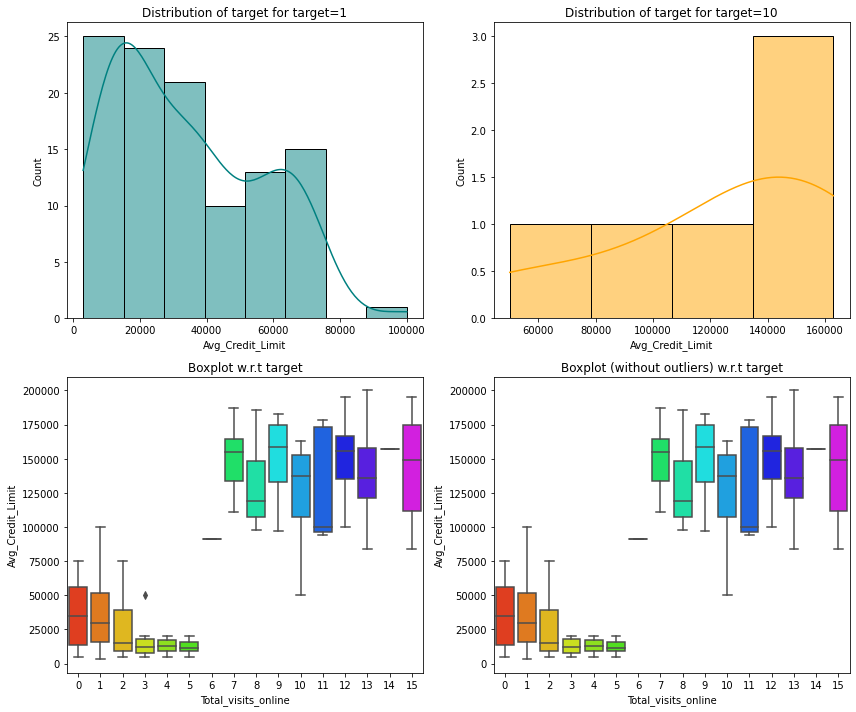

<IPython.core.display.Javascript object>

In [179]:
distribution_plot_wrt_target(df, "Avg_Credit_Limit", "Total_visits_online")

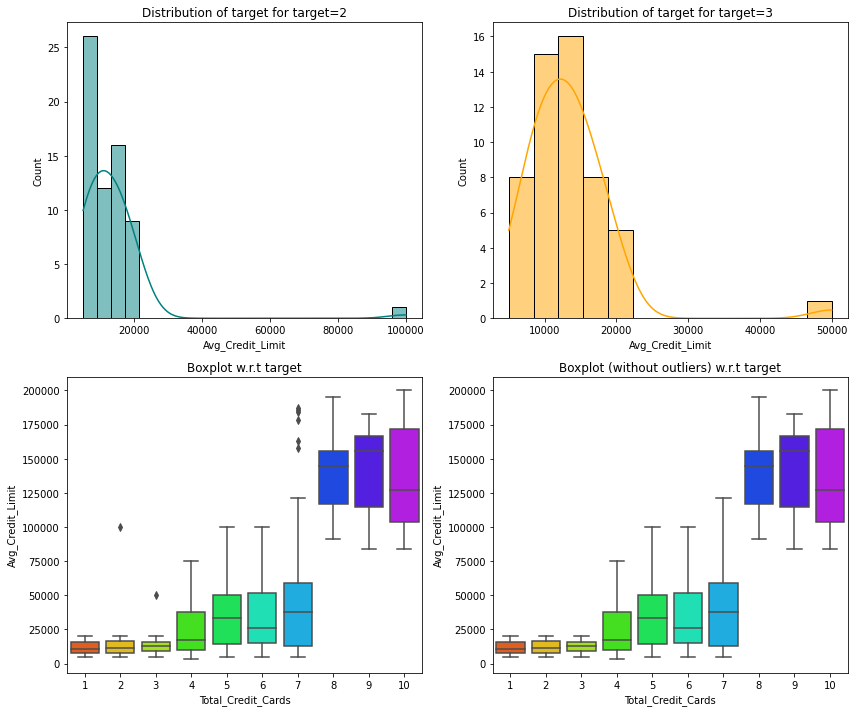

<IPython.core.display.Javascript object>

In [180]:
distribution_plot_wrt_target(df, "Avg_Credit_Limit", "Total_Credit_Cards")

### EDA Insights
- The boxplots for both 'Total Credit Cards' and 'Total Visits Online' change dramatically without the outliers
- Considering the % of the data these outliers make up and the marginal difference in the boxplots with and without the outliers in regard to average credit limit im not going to treat these.
- The shape of 'Total Credit Cards' does not really change in regards to Average Credit Limit which reinforces my decision to leave them alone
- The shape of 'Total Visits Online' does change a bit, but considering the limited difference in boxplots and the % of the data this will also go untreated

#### Scaling Avg_Credit_Limit

In [185]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
#subset = df['Avg_Credit_Limit'].tolist()
subset = df.Avg_Credit_Limit.values.tolist()
subset_scaled = scaler.fit_transform(subset)

ValueError: Expected 2D array, got 1D array instead:
array=[100000.  50000.  50000.  30000. 100000.  20000. 100000.  15000.   5000.
   3000.  10000.  13000.  11000.   9000.   6000.   8000.  15000.   8000.
  11000.  19000.   5000.  16000.   6000.   9000.   8000.  18000.  16000.
   9000.   5000.   8000.  16000.  11000.   6000.  16000.   8000.  19000.
   9000.  17000.  13000.  10000.  19000.  10000.  16000.  20000.  11000.
  14000.   5000.  11000.   6000.  14000.  13000.   6000.  17000.   9000.
  14000.   6000.   6000.   6000.   9000.  19000.  20000.  18000.   5000.
  14000.  12000.  16000.  19000.   9000.   7000.  20000.  14000.   6000.
  11000.  19000.   7000.  16000.  17000.  13000.   6000.  15000.  20000.
   7000.  13000.  13000.   9000.  10000.   6000.   5000.   8000.   7000.
  13000.  13000.   5000.   8000.  20000.   5000.  18000.  15000.  13000.
   5000.  11000.  11000.  10000.  13000.  17000.  12000.  20000.   5000.
   8000.  18000.  15000.  12000.  18000.   7000.  18000.   7000.  18000.
  17000.  14000.   9000.  10000.  13000.  10000.  17000.   5000.  14000.
  20000.   6000.   8000.   9000.  18000.   9000.  12000.  10000.  13000.
  15000.  17000.  15000.  15000.  19000.  14000.  16000.   9000.   9000.
  10000.  13000.  13000.   5000.   7000.  14000.  11000.  19000.  15000.
   7000.   8000.  19000.  12000.  17000.  10000.   8000.   7000.   8000.
   8000.  16000.  13000.  14000.  13000.  15000.   9000.  14000.   7000.
   6000.  20000.   9000.  17000.   6000.  11000.  14000.   6000.  19000.
  10000.  13000.  11000.  16000.  14000.  18000.   9000.  16000.  17000.
   6000.  20000.  10000.  20000.   6000.  12000.   8000.  14000.  12000.
  19000.   7000.   8000.  11000.   5000.   9000.  17000.  17000.  17000.
  19000.  11000.   9000.  16000.  10000.  10000.   8000.  15000.   8000.
  11000.  11000.  19000.  13000.   8000.   7000.  20000.  20000.  12000.
  16000.   8000.   8000.  10000.   8000.  17000.  19000.  20000.  13000.
  16000.  13000.   8000.   8000.  19000.  16000.  20000.  10000.   8000.
  12000.   5000.  10000.   7000.  19000.  11000.   9000.  18000.  18000.
   9000.  18000.  16000.   7000.  13000.  10000.  12000.   6000.  15000.
  18000.  14000.  14000.  17000.   9000.  20000.  15000.  17000.  16000.
  10000.   7000.  17000.  18000.  10000.  16000.  15000.  17000.  10000.
   6000.   7000.  14000.   6000.   7000.  12000.  11000.   8000.  19000.
   7000.   7000.  18000.   5000.  17000.   6000.   7000.  10000.  11000.
   7000.  12000.   9000.  15000.   8000.  17000.  13000.  16000.  19000.
  19000.   8000.  10000.  14000.   5000.  10000.   5000.   7000.  12000.
  19000.  18000.   5000.  14000.   8000.  12000.   9000.   8000.   6000.
   9000.  14000.   6000.  11000.  14000.   5000.  19000.  18000.  17000.
  15000.   8000.  19000.  12000.   6000.  20000.  10000.   7000.  18000.
   9000.   6000.  16000.  14000.  19000.   5000.  18000.  11000.  11000.
  12000.  15000.   9000.   9000.  10000.  16000.   7000.   9000.   8000.
  14000.  18000.  20000.   6000.  13000.  13000.  17000.   8000.  20000.
  19000.  11000.   6000.  17000.   6000.  18000.  16000.  13000.  19000.
  12000.   6000.  13000.  19000.   6000.  18000.   8000.   8000.  18000.
   8000.  12000.  11000.  11000.  13000.   6000.  20000.  13000.   5000.
  73000.  49000.  67000.  61000.  75000.  48000.  56000.  72000.  70000.
  51000.  73000.  50000.  49000.  69000.  40000.  44000.  31000.  37000.
  65000.  48000.  46000.  61000.  74000.  58000.  39000.  70000.  56000.
  52000.  33000.  47000.  71000.  50000.  56000.  41000.  71000.  72000.
  59000.  64000.  45000.  74000.  73000.  54000.  31000.  66000.  50000.
  27000.  51000.  65000.  67000.  43000.  70000.  61000.  31000.  36000.
  51000.  36000.  50000.  74000.  25000.  47000.  41000.  57000.  67000.
  74000.  26000.  38000.  75000.  38000.  52000.  48000.  70000.  36000.
  36000.  66000.  37000.  48000.  35000.  26000.  38000.  45000.  70000.
  51000.  34000.  47000.  47000.  30000.  74000.  30000.  28000.  58000.
  64000.  39000.  44000.  50000.  65000.  63000.  50000.  35000.  29000.
  56000.  49000.  52000.  31000.  68000.  41000.  38000.  54000.  70000.
  34000.  68000.  26000.  42000.  59000.  30000.  33000.  49000.  62000.
  40000.  30000.  37000.  32000.  62000.  36000.  57000.  39000.  70000.
  36000.  69000.  59000.  71000.  29000.  37000.  34000.  34000.  38000.
  32000.  48000.  36000.  56000.  28000.  48000.  68000.  74000.  70000.
  45000.  60000.  47000.  60000.  54000.  28000.  68000.  26000.  56000.
  39000.  59000.  37000.  65000.  41000.  33000.  52000.  60000.  62000.
  40000.  41000.  46000.  29000.  56000.  69000.  36000.  69000.  38000.
  29000.  58000.  72000.  64000.  36000.  71000.  66000.  70000.  73000.
  30000.  44000.  39000.  65000.  52000.  26000.  68000.  52000.  34000.
  39000.  31000.  70000.  55000.  29000.  36000.  68000.  54000.  66000.
  60000.  41000.  42000.  38000.  64000.  57000.  68000.  33000.  37000.
  60000.  27000.  36000.  63000.  34000.  47000.  38000.  39000.  46000.
 157000.  94000. 163000. 131000.  96000. 136000. 121000. 158000. 108000.
 166000. 176000. 166000. 178000.  91000. 156000. 146000.  84000. 155000.
 200000. 195000. 187000. 163000. 106000. 114000. 126000. 173000. 153000.
 184000. 123000. 144000.  97000.  98000. 127000. 171000. 186000. 183000.
 111000. 112000. 195000. 132000. 156000.  95000. 172000.  99000.  84000.
 145000. 172000. 167000.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<IPython.core.display.Javascript object>

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
subset_scaled_df.head()

### K-Means Clustering
- Apply K-means Clustering 
- Plot the Elbow curve 
- Check Silhouette Scores 
- Figure out appropriate number of clusters 
- Cluster Profiling  

### Applying Hierarchical Clustering 
- Apply Hierarchical clustering with different linkage methods 
- Plot dendrograms for each linkage method 
- Check cophenetic correlation for each linkage method 
- Figure out appropriate number of clusters - Cluster Profiling  

### K-means vs Hierarchical Clustering - 2  
- Compare clusters obtained from K-means and Hierarchical clustering techniques  